In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tsplib95 # allows easy reading of tsplib files


We expect the results file to have:
```
TSP_FILENAME as a string
SOLUTION_ARRAY as a sequence of indeces
COST as an int
```

if any new values need to be added, we'll change the specs

In [2]:
# read results file

results_file = "../results/dummy_result.txt"
with open(results_file) as results:
    text = results.readlines()
tsp_file = text[0].strip()
solution = list(map(int, str.split(text[1].strip(), " "))) # parse string as list of int
cost = float(text[2].strip())
print("TSP FILE: ", tsp_file)
print("SOLUTION SEQUENCE: ", solution)
print("COST: ", cost)


TSP FILE:  ./data/berlin52.tsp
SOLUTION SEQUENCE:  [51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
COST:  69.0


In [3]:
problem = tsplib95.load("."+tsp_file)# convert from worpsace folder to local folder
print(problem.name)
print(problem.comment)
print(problem.type)
print(problem.fields_by_keyword)

berlin52
52 locations in Berlin (Groetschel)
TSP
{'NAME': <StringField('NAME')>, 'COMMENT': <StringField('COMMENT')>, 'TYPE': <StringField('TYPE')>, 'DIMENSION': <IntegerField('DIMENSION')>, 'CAPACITY': <IntegerField('CAPACITY')>, 'NODE_COORD_TYPE': <StringField('NODE_COORD_TYPE')>, 'EDGE_WEIGHT_TYPE': <StringField('EDGE_WEIGHT_TYPE')>, 'DISPLAY_DATA_TYPE': <StringField('DISPLAY_DATA_TYPE')>, 'EDGE_WEIGHT_FORMAT': <StringField('EDGE_WEIGHT_FORMAT')>, 'EDGE_DATA_FORMAT': <StringField('EDGE_DATA_FORMAT')>, 'NODE_COORD_SECTION': <IndexedCoordinatesField('NODE_COORD_SECTION')>, 'EDGE_DATA_SECTION': <EdgeDataField('EDGE_DATA_SECTION')>, 'EDGE_WEIGHT_SECTION': <MatrixField('EDGE_WEIGHT_SECTION')>, 'DISPLAY_DATA_SECTION': <IndexedCoordinatesField('DISPLAY_DATA_SECTION')>, 'FIXED_EDGES_SECTION': <EdgeListField('FIXED_EDGES_SECTION')>, 'DEPOT_SECTION': <DepotsField('DEPOT_SECTION')>, 'DEMAND_SECTION': <DemandsField('DEMAND_SECTION')>, 'TOUR_SECTION': <ToursField('TOUR_SECTION')>}


In [4]:
problem.node_coords

coordinates = list(problem.node_coords.values())
print(coordinates[0])
print(problem.node_coords[1])
coordinates = np.array(coordinates)


[565.0, 575.0]
[565.0, 575.0]


/tmp/ipykernel_866/2708602184.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, c=colors[index]) # draw nodes


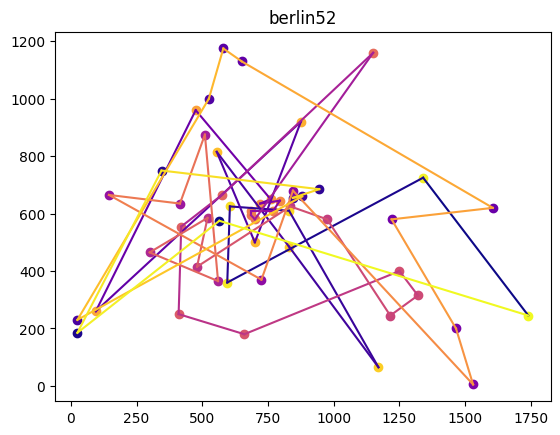

In [5]:
fig, ax = plt.subplots()

colormap = plt.cm.plasma # colormap to define color cycle 
colors = [colormap(i) for i in np.linspace(0, 1, problem.dimension)]

for index in range(problem.dimension):
    x, y = coordinates[index]
    ax.scatter(x, y, c=colors[index]) # draw nodes

for i in range(problem.dimension):
    sol_index = solution[i]
    x, y = coordinates[sol_index]
    next_index = solution[(i + 1) % problem.dimension]
    next_x, next_y = coordinates[next_index]
    ax.plot([x, next_x], [y, next_y], c=colors[i])




ax.set_title(problem.name)

fig.show()

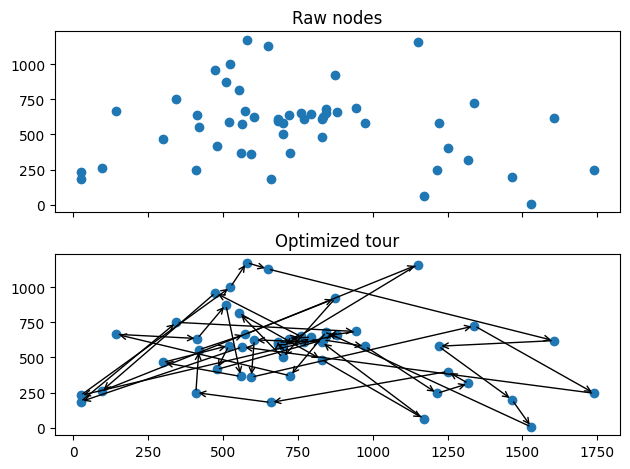

In [6]:
## Oddly seems to have arroows in the wrong directionsolution
fig, ax = plt.subplots(2, sharex=True, sharey=True)         # Prepare 2 plots
ax[0].set_title('Raw nodes')
ax[1].set_title('Optimized tour')
ax[0].scatter(coordinates[:, 0], coordinates[:, 1])             # plot A
ax[1].scatter(coordinates[:, 0], coordinates[:, 1])             # plot B
start_node = 0
distance = 0.
for i in range(problem.dimension):
    start_pos = coordinates[start_node]
    # needed because of MIP-approach used for TSP
    next_node = solution[i]
    end_pos = coordinates[next_node]
    ax[1].annotate("",
                   xy=start_pos, xycoords='data',
                   xytext=end_pos, textcoords='data',
                   arrowprops=dict(arrowstyle="->",
                                   connectionstyle="arc3"))
    distance += np.linalg.norm(end_pos - start_pos)
    start_node = next_node

textstr = "N nodes: %d\nTotal length: %.3f" % (problem.dimension, distance)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax[1].text(0.05, 0.95, textstr, transform=ax[1].transAxes, fontsize=14,  # Textbox verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()
